# Tarea 4, Algoritmos de Aprendizaje no Supervizado
**Plantamiento del problema:** Haciendo uso del data set **Mall Customer Segmentation**,
disenar modelos de agrupacion (clustering) mediante el uso de **k-means** y **hierarchical clustering**.

El ejercicio debe de contener:
  1. Un analisis exploratorio de los datos para identificar relaciones entre variables, valores atipicos, tendencias, etc.
  2. Preprocesar los datos limpiandolos, tratando valores faltantes y transformandolos segun sea necesario.
  3. Seleccionar las caracteristicas mas relevantes para entrenar el modelo, utilizando seleccion de caracteristicas.
  4. Entrenar el modelo configurando los diferentes hiperparametros.
  5. Evaluar el desempeno del modelo con metricas como coeficiente de silhouette, indice de calinski-ha

## 1. Analisis exploratorio | 2. Preprocesado de datos

In [1]:
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

In [2]:
# Importacion de librerias necesarias
import pandas as pd # Para manipulacion de datos
import seaborn as sns # Para visualizacion de graficos
import matplotlib.pyplot as plt # Biblioteca de algortimos
# Biblioteca de algortimos de aprendizaje automatico
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Cargamos los datos
mall_df = pd.read_csv('./Mall_Customers.csv')
# Imprimimos 5 datos para verificar
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Revisamos las dimensiones del data set
mall_df.shape

(200, 5)

In [4]:
# Hacemos un analisis columna a columna de los datos
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Eliminados la columna CustomerID ya que no sera relevante para el modelo
mall_df.drop(columns=['CustomerID'], inplace=True)

In [6]:
# Identificacion de posibles datos nulos
mall_df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

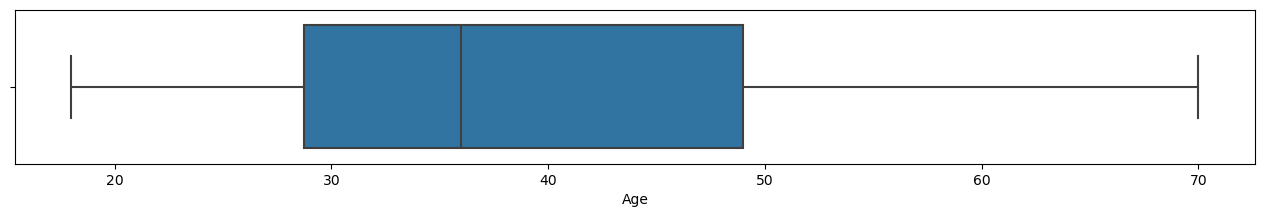

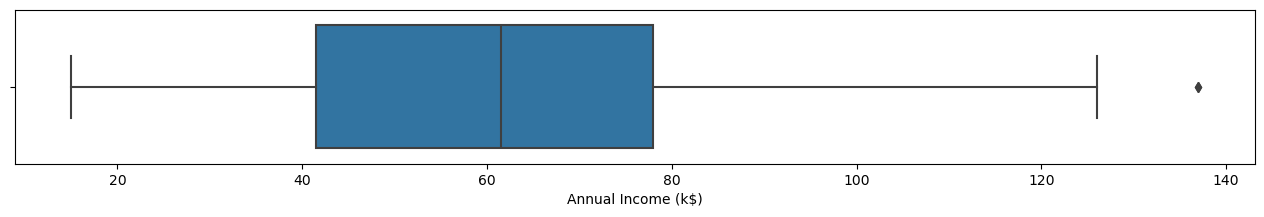

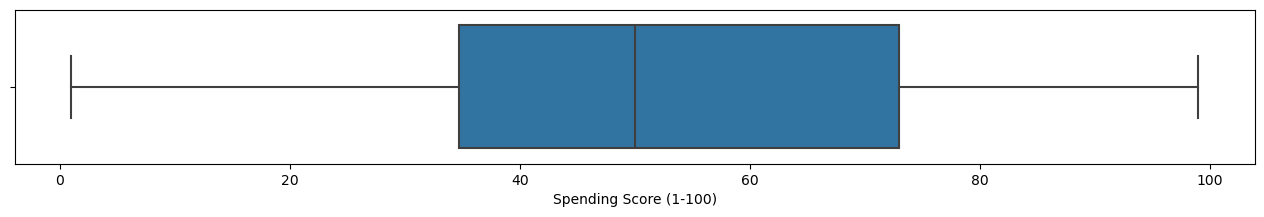

In [7]:
# Identificacion de valores atipicos por cada columna
for column in mall_df.describe().columns:
    plt.figure(figsize=(16,2))
    sns.boxplot(data=mall_df, x=column)
    plt.show()

## 3. Seleccion de variables relevantes

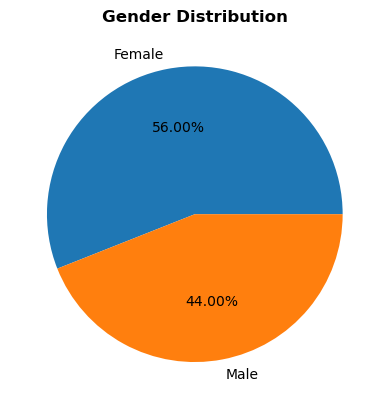

In [8]:
# Analisis por variable de genero (Gender)
gender_count = mall_df['Gender'].value_counts()
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

<Figure size 640x480 with 0 Axes>

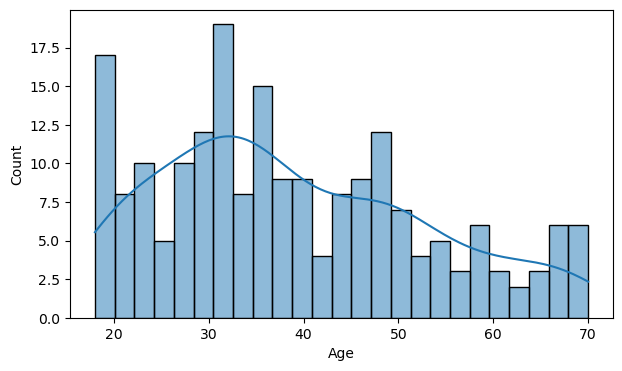

<Figure size 640x480 with 0 Axes>

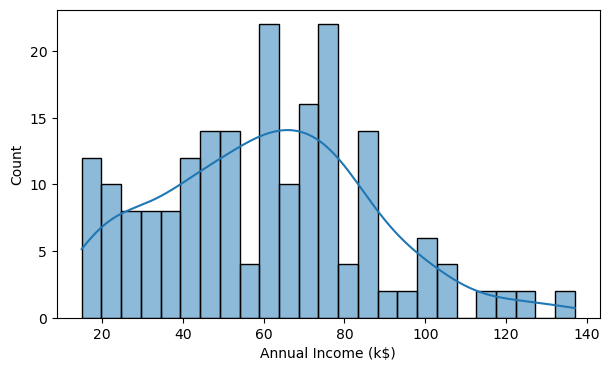

<Figure size 640x480 with 0 Axes>

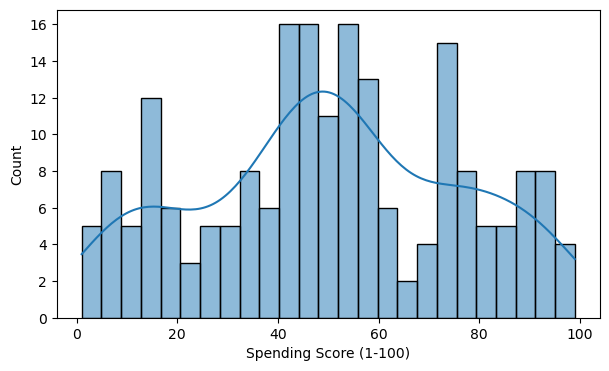

In [9]:
# Ahora analizaremos cada una de las variables en base a una distrucion para buscar tendencias
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure()
    set_size_style(7,4)
    sns.histplot(mall_df[col],bins = 25, kde=True)

### Conclusiones
1. El genero femenino predomina en la base de clientes
2. Las edades de los clientes estan entre los 20 y 40 anios
3. Las ganancias anuales de los clientes oscilan en su mayoria entre los 40 y 80 mil anulaes
4. El puntaje de gasto en su mayoria esta entre los 40 y 60 puntos

### Ahora revisaremos la correlacion entre datos

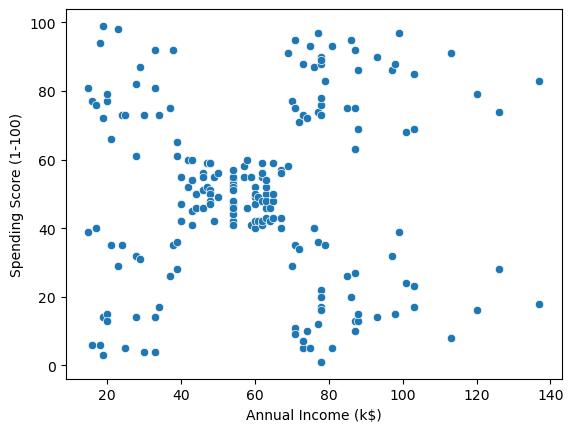

In [10]:
# Correlacion entre las ganancias anuales de cada cliente y el puntaje de gasto
ax=sns.scatterplot(data=mall_df,x='Annual Income (k$)',y='Spending Score (1-100)')

### Conclusiones
1. No se observa una correlaciones en la grafica, por lo cual nos indica que no hay relacion entre que un cliente gane y gaste.

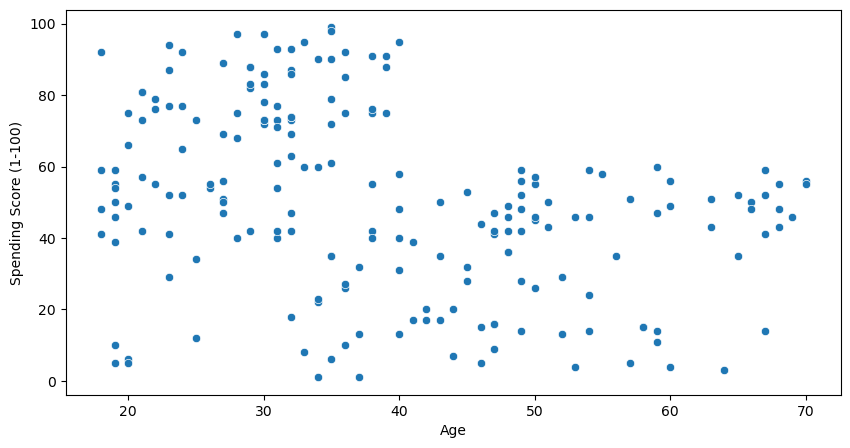

In [13]:
# Correlacion entre la edad y el puntaje de gasto
set_size_style(10,5)
ax = sns.scatterplot(data = mall_df, x = 'Age', y = 'Spending Score (1-100)')

### Conclusiones
1. Los clientes con un score por debajo de 60 tienden a estar por encima de los 40 anios
2. Los clientes menos de 40 anios tienden a tener un puntaje de gasto superior

## 4. Entrenamiento de modelo
A continuacion realizaremos los pasos necesarios para el agrupamiento por medio de k-means clustering

In [16]:
# Debemos de limpiar el dataset para que todas las columnas correspondan a valores numericos, en este caso
# el unico valor que no es numerico es el genero, para lo cual crearemos dos columnas adicionales (female & male) con valores booleanos
genders_df = pd.get_dummies(mall_df['Gender'],dtype=int)
genders_df.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [21]:
# Ahora juntamos las columnas con el dataset original
mall_normalized_df = pd.concat([mall_df, genders_df], axis = 'columns')
mall_normalized_df.drop(columns=['Gender'], inplace=True)
mall_normalized_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [22]:
scaler = StandardScaler()
scaler.fit(mall_normalized_df)

StandardScaler()

In [24]:
scaled_data = scaler.transform(mall_normalized_df)
customer_scaled = pd.DataFrame(data = scaled_data, columns = mall_normalized_df.columns)
customer_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [25]:
pca = PCA()
pca.fit(customer_scaled)

PCA()

In [26]:
pca.explained_variance_ratio_

array([4.05210996e-01, 2.61892285e-01, 1.98345591e-01, 1.34551127e-01,
       5.91419571e-34])

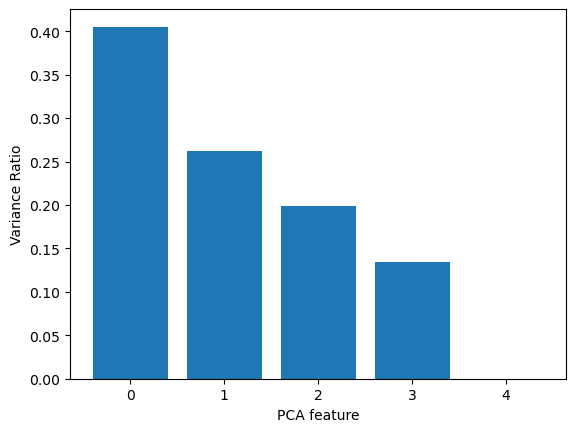

In [27]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Variance Ratio')
plt.xlabel('PCA feature')
plt.show()

In [30]:
pca = PCA(n_components = 3)
customer_pca = pca.fit_transform(customer_scaled)
customer_pca

array([[ 1.32190829e+00, -7.82593850e-01, -1.91316957e+00],
       [ 1.15001870e+00, -1.81681292e+00, -2.00280489e+00],
       [-1.32003278e+00,  6.07360185e-01, -1.54554081e+00],
       [-1.61384934e+00, -1.15995935e+00, -1.69845016e+00],
       [-1.37654369e+00,  2.34456765e-01, -1.54614161e+00],
       [-1.61503894e+00, -1.18630229e+00, -1.66186804e+00],
       [-1.18676491e+00,  1.34840967e+00, -1.41527543e+00],
       [-1.68466941e+00, -1.62589038e+00, -1.66185919e+00],
       [ 1.87798964e+00,  2.41946410e+00, -1.51513053e+00],
       [-1.52333871e+00, -6.86323906e-01, -1.54778664e+00],
       [ 1.85403933e+00,  2.27207653e+00, -1.52961711e+00],
       [-1.60223657e+00, -1.16596003e+00, -1.59192534e+00],
       [-1.02590985e+00,  2.24540259e+00, -1.27673100e+00],
       [-1.59405689e+00, -1.12399330e+00, -1.54319834e+00],
       [ 1.60610643e+00,  7.99600664e-01, -1.59831394e+00],
       [ 1.18162771e+00, -1.73032429e+00, -1.80503361e+00],
       [-1.30873721e+00,  5.55017103e-01

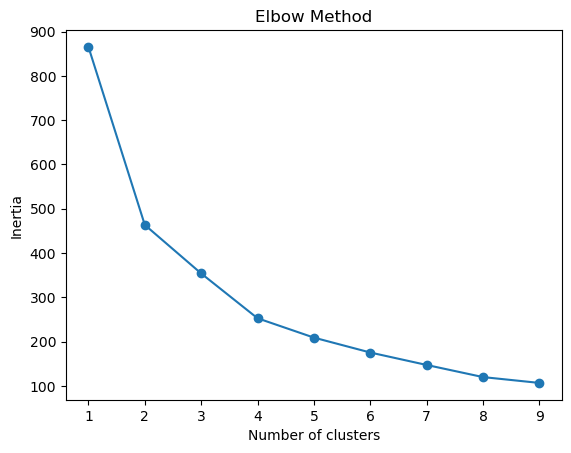

In [31]:
inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(customer_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

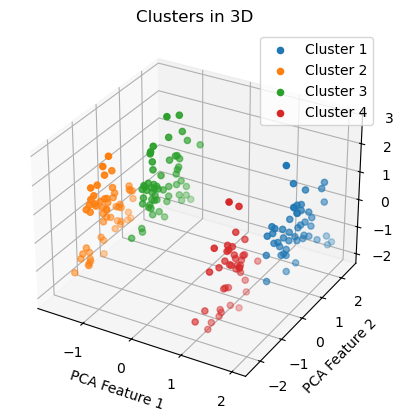

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(customer_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in range(4):
    cluster_points = customer_pca[cluster_labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster + 1}')

ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
ax.set_title('Clusters in 3D')

plt.legend()
plt.show()

In [37]:
mall_df['label'] = kmeans.labels_
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2


In [38]:
mall_df.groupby('label').agg({
    'Age': 'mean', 
    'Annual Income (k$)': 'mean', 
    'Spending Score (1-100)': 'mean'
})

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,49.437500,62.416667,29.208333
1,28.392857,60.428571,68.178571
2,47.803571,58.071429,34.875000
3,28.250000,62.000000,71.675000


## Conclusiones
1. Existe un grupo de clientes, que teniendo una edad promedio de 28 anios y con unos ingreso anuales promedios de 62 mil, tienen un puntaje de gasto por enciama de 70, lo cual los convierte en un objetivo a apuntar para una posible campania publicitaria.
2. Las personas con una edad por encima de los 47 anios, tienen una tendencia al consumo demasiado baja, mientras que las personas por debajo de 30 son las mas propensas a gastar.
3. El ingreso anual sin importar el grupo, no representa una variabilidad importante en el consumo.